# Advanced Linear Regression Assignment - House Pricing

### Problem Statement: 
A US-based housing company, Surprise Housing plans to enter the Australian market by purchasing houses at a price below their actual values and flip them on at a higher price.

The company wants to know:

- Which variables are significant in predicting the price of a house.

- How well those variables describe the price of a house.

Our objective is to build a regression model using regularisation to help the company predict the actual value of the prospective properties and decide whether or not to invest in them.

### Steps involved in the process of building model for House Pricing - 

- Reading and Understanding Data
- Data Cleaning and Data Visualizing
- Data Preparation
- Model Building and Evaluation: MLR, Ridge and Lasso Regression
- Summarize the Observation

### Step 1 - Reading and Understanding Data

In [1]:
# Importing the required libraries

# for numerical and data analysis
import numpy as np
import pandas as pd

# for visualization
import matplotlib.pyplot as plt
import seaborn as sns

# for model development and train-test split
from sklearn import linear_model
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.feature_selection import RFE

from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import Pipeline

# for model evaluation
import statsmodels.api as sm
from sklearn import metrics
from sklearn.metrics import r2_score, mean_squared_error

# display options
pd.options.display.max_rows = 100
pd.options.display.max_columns = 100

# for supressing warnings
import warnings
warnings.filterwarnings('ignore')

In [2]:
# Reading the data
df = pd.read_csv("train.csv")
df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,Ex,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,NaN,Attchd,2003.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,NaN,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,Ex,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,Ex,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,NaN,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,Gd,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.0,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.0,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


#### Inspecting various aspects of dataset

In [3]:
df.shape

(1460, 81)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [5]:
df.describe(include='all')

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
count,1460.000000,1460.000000,1460,1201.000000,1460.000000,1460,91,1460,1460,1460,1460,1460,1460,1460,1460,1460,1460,1460.000000,1460.000000,1460.000000,1460.000000,1460,1460,1460,1460,588,1452.000000,1460,1460,1460,1423,1423,1422,1423,1460.000000,1422,1460.000000,1460.000000,1460.000000,1460,1460,1460,1459,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460,1460.000000,1460,1460.000000,770,1379,1379.000000,1379,1460.000000,1460.000000,1379,1379,1460,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,7,281,54,1460.000000,1460.000000,1460.000000,1460,1460,1460.000000
unique,NaN,NaN,5,NaN,NaN,2,2,4,4,2,5,3,25,9,8,5,8,NaN,NaN,NaN,NaN,6,8,15,16,3,NaN,4,5,6,4,4,4,6,NaN,6,NaN,NaN,NaN,6,5,2,5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4,NaN,7,NaN,5,6,NaN,3,NaN,NaN,5,5,3,NaN,NaN,NaN,NaN,NaN,NaN,3,4,4,NaN,NaN,NaN,9,6,NaN
top,NaN,NaN,RL,NaN,NaN,Pave,Grvl,Reg,Lvl,AllPub,Inside,Gtl,NAmes,Norm,Norm,1Fam,1Story,NaN,NaN,NaN,NaN,Gable,CompShg,VinylSd,VinylSd,BrkFace,NaN,TA,TA,PConc,TA,TA,No,Unf,NaN,Unf,NaN,NaN,NaN,GasA,Ex,Y,SBrkr,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,TA,NaN,Typ,NaN,Gd,Attchd,NaN,Unf,NaN,NaN,TA,TA,Y,NaN,NaN,NaN,NaN,NaN,NaN,Gd,MnPrv,Shed,NaN,NaN,NaN,WD,Normal,NaN
freq,NaN,NaN,1151,NaN,NaN,1454,50,925,1311,1459,1052,1382,225,1260,1445,1220,726,NaN,NaN,NaN,NaN,1141,1434,515,504,445,NaN,906,1282,647,649,1311,953,430,NaN,1256,NaN,NaN,NaN,1428,741,1365,1334,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,735,NaN,1360,NaN,380,870,NaN,605,NaN,NaN,1311,1326,1340,NaN,NaN,NaN,NaN,NaN,NaN,3,157,49,NaN,NaN,NaN,1267,1198,NaN
mean,730.500000,56.897260,NaN,70.049958,10516.828082,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6.099315,5.575342,1971.267808,1984.865753,NaN,NaN,NaN,NaN,NaN,103.685262,NaN,NaN,NaN,NaN,NaN,NaN,NaN,443.639726,NaN,46.549315,567.240411,1057.429452,NaN,NaN,NaN,NaN,1162.626712,346.992466,5.844521,1515.463699,0.425342,0.057534,1.565068,0.382877,2.866438,1.046575,NaN,6.517808,NaN,0.613014,NaN,NaN,1978.506164,NaN,1.767123,472.980137,NaN,NaN,NaN,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,NaN,NaN,NaN,43.489041,6.321918,2007.815753,NaN,NaN,180921.195890
std,421.610009,42.300571,NaN,24.284752,9981.264932,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.382997,1.112799,30.202904,20.645407,NaN,NaN,NaN,NaN,NaN,181.066207,NaN,NaN,NaN,NaN,NaN,NaN,NaN,456.098091,NaN,161.319273,441.866955,438.705324,NaN,NaN,NaN,NaN,386.587738,436.528436,48.623081,525.480383,0.518911,0.238753,0.550916,0.502885,0.815778,0.220338,NaN,1.625393,NaN,0.644666,NaN,NaN,24.689725,NaN,0.747315,213.804841,NaN,NaN,NaN,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,NaN,NaN,NaN,496.123024,2.703626,1.328095,NaN,NaN,79442.502883
min,1.000000,20.000000,NaN,21.000000,1300.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.000000,1.000000,1872.000000,1950.000000,NaN,NaN,NaN,NaN,NaN,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000000,NaN,0.000000,0.000000,0.000000,NaN,NaN,NaN,NaN,334.000000,0.000000,0.000000,334.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,NaN,2.000000,NaN,0.000000,NaN,NaN,1900.000000,N

In [6]:
# Separating numerical variables and categorical variables based on data dictionary

num_vars = ['LotFrontage','LotArea','MasVnrArea','BsmtFinSF1','BsmtFinSF2','BsmtUnfSF','TotalBsmtSF','1stFlrSF',
            '2ndFlrSF','LowQualFinSF','GrLivArea','BsmtFullBath','BsmtHalfBath','FullBath','HalfBath','BedroomAbvGr',
            'KitchenAbvGr','TotRmsAbvGrd','Fireplaces','GarageCars','GarageArea','WoodDeckSF','OpenPorchSF','EnclosedPorch',
            '3SsnPorch','ScreenPorch','PoolArea','MiscVal']

cat_vars = ['Id','MSSubClass','MSZoning','Street','Alley','LotShape','LandContour','Utilities','LotConfig','LandSlope',
            'Neighborhood','Condition1','Condition2','BldgType','HouseStyle','OverallQual','OverallCond','YearBuilt',
            'YearRemodAdd','RoofStyle','RoofMatl','Exterior1st','Exterior2nd','MasVnrType','ExterQual','ExterCond',
            'Foundation','BsmtQual','BsmtCond','BsmtExposure','BsmtFinType1','BsmtFinType2','Heating','HeatingQC',
            'CentralAir','Electrical','KitchenQual','Functional','FireplaceQu','GarageType','GarageYrBlt','GarageFinish',
            'GarageQual','GarageCond','PavedDrive','PoolQC','Fence','MiscFeature','MoSold','YrSold','SaleType','SaleCondition']

target = ['SalePrice']

len(num_vars)+len(cat_vars)+len(target)

81

### Step 2 - Data Cleaning and Data Visualizing

#### Handling Missing Values

In [7]:
# Checking for null values
df.isnull().sum()

Id                  0
MSSubClass          0
MSZoning            0
LotFrontage       259
LotArea             0
Street              0
Alley            1369
LotShape            0
LandContour         0
Utilities           0
LotConfig           0
LandSlope           0
Neighborhood        0
Condition1          0
Condition2          0
BldgType            0
HouseStyle          0
OverallQual         0
OverallCond         0
YearBuilt           0
YearRemodAdd        0
RoofStyle           0
RoofMatl            0
Exterior1st         0
Exterior2nd         0
MasVnrType        872
MasVnrArea          8
ExterQual           0
ExterCond           0
Foundation          0
BsmtQual           37
BsmtCond           37
BsmtExposure       38
BsmtFinType1       37
BsmtFinSF1          0
BsmtFinType2       38
BsmtFinSF2          0
BsmtUnfSF           0
TotalBsmtSF         0
Heating             0
HeatingQC           0
CentralAir          0
Electrical          1
1stFlrSF            0
2ndFlrSF            0
LowQualFin

In [8]:
# As per data dictionary the following categorical features showing null values imply absence of such facility. 
# Hence, we will impute the null values of such categorical variables with 'none'

cat_vars_null = ['Alley', 'MasVnrType', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 'FireplaceQu', 
                 'GarageType', 'GarageFinish', 'GarageQual', 'GarageCond', 'PoolQC', 'Fence', 'MiscFeature']

for i in cat_vars_null:
    df[i].fillna("none", inplace=True)
    


In [9]:
# Checking null values again
df.isnull().sum()

Id                 0
MSSubClass         0
MSZoning           0
LotFrontage      259
LotArea            0
Street             0
Alley              0
LotShape           0
LandContour        0
Utilities          0
LotConfig          0
LandSlope          0
Neighborhood       0
Condition1         0
Condition2         0
BldgType           0
HouseStyle         0
OverallQual        0
OverallCond        0
YearBuilt          0
YearRemodAdd       0
RoofStyle          0
RoofMatl           0
Exterior1st        0
Exterior2nd        0
MasVnrType         0
MasVnrArea         8
ExterQual          0
ExterCond          0
Foundation         0
BsmtQual           0
BsmtCond           0
BsmtExposure       0
BsmtFinType1       0
BsmtFinSF1         0
BsmtFinType2       0
BsmtFinSF2         0
BsmtUnfSF          0
TotalBsmtSF        0
Heating            0
HeatingQC          0
CentralAir         0
Electrical         1
1stFlrSF           0
2ndFlrSF           0
LowQualFinSF       0
GrLivArea          0
BsmtFullBath 

In [10]:
# For 'Electrical' feature, relpacing null value with the most frequently occuring level of category (mode) in this feature.
df["Electrical"].fillna(df["Electrical"].mode()[0], inplace=True)

# For 'GarageYrBlt' column, we will impute the value same as 'YearBuilt' of the property
df["GarageYrBlt"].fillna(df["YearBuilt"], inplace=True)

# For 'MasVnrArea' column, we noticed its null for corresponding 'MasVnrType' is N/A or none. Hence we will impute the values in 'MasVnrArea' as zero.
df["MasVnrArea"].fillna(0, inplace=True)

# Since data disctionary defines 'LotFrontage' as Linear feet of street connected to property.We will impute values using 'neighbourhood' mean values.
df['LotFrontage'] = df.groupby("Neighborhood")["LotFrontage"].transform(lambda x: x.fillna(x.mean()))

# Checking the null values once again
df.isnull().sum()

Id               0
MSSubClass       0
MSZoning         0
LotFrontage      0
LotArea          0
Street           0
Alley            0
LotShape         0
LandContour      0
Utilities        0
LotConfig        0
LandSlope        0
Neighborhood     0
Condition1       0
Condition2       0
BldgType         0
HouseStyle       0
OverallQual      0
OverallCond      0
YearBuilt        0
YearRemodAdd     0
RoofStyle        0
RoofMatl         0
Exterior1st      0
Exterior2nd      0
MasVnrType       0
MasVnrArea       0
ExterQual        0
ExterCond        0
Foundation       0
BsmtQual         0
BsmtCond         0
BsmtExposure     0
BsmtFinType1     0
BsmtFinSF1       0
BsmtFinType2     0
BsmtFinSF2       0
BsmtUnfSF        0
TotalBsmtSF      0
Heating          0
HeatingQC        0
CentralAir       0
Electrical       0
1stFlrSF         0
2ndFlrSF         0
LowQualFinSF     0
GrLivArea        0
BsmtFullBath     0
BsmtHalfBath     0
FullBath         0
HalfBath         0
BedroomAbvGr     0
KitchenAbvGr

#### Adding/Dropping Features

In [11]:
# Dropping Id column
df = df.drop(['Id'], axis = 1)

In [12]:
# Creating column for age of property using Year of Renovation and Year of Property Sold
df['AgeOfProp'] = (df['YrSold'] - df['YearRemodAdd'])

# Creating column for age of Garage using GarageYrBlt and Year of Property Sold
df['AgeOfGarage'] = (df['YrSold'] - df['GarageYrBlt'])

# Dropping redundant columns of YearBuilt, YearRemodAdd, MoSold, YrSold
df = df.drop(['YearBuilt','YearRemodAdd', 'MoSold', 'YrSold', 'GarageYrBlt'], axis = 1)
df.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,SaleType,SaleCondition,SalePrice,AgeOfProp,AgeOfGarage
0,60,RL,65.0,8450,Pave,none,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,Ex,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,none,Attchd,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,none,none,none,0,WD,Normal,208500,5,5.0
1,20,RL,80.0,9600,Pave,none,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,Gable,CompShg,MetalSd,MetalSd,none,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,Ex,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,none,none,none,0,WD,Normal,181500,31,31.0
2,60,RL,68.0,11250,Pave,none,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,Ex,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,none,none,none,0,WD,Normal,223500,6,7.0
3,70,RL,60.0,9550,Pave,none,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,Gable,CompShg,Wd Sdng,Wd Shng,none,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,Gd,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,none,none,none,0,WD,Abnorml,140000,36,8.0
4,60,RL,84.0,14260,Pave,none,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,none,none,none,0,WD,Normal,250000,8,8.0


In [13]:
# Updating cat_vars list and num_list
remove_list = ['Id','YearBuilt','YearRemodAdd', 'MoSold', 'YrSold', 'GarageYrBlt']
cat_vars = [elem for elem in cat_vars if elem not in remove_list]
cat_vars

['MSSubClass',
 'MSZoning',
 'Street',
 'Alley',
 'LotShape',
 'LandContour',
 'Utilities',
 'LotConfig',
 'LandSlope',
 'Neighborhood',
 'Condition1',
 'Condition2',
 'BldgType',
 'HouseStyle',
 'OverallQual',
 'OverallCond',
 'RoofStyle',
 'RoofMatl',
 'Exterior1st',
 'Exterior2nd',
 'MasVnrType',
 'ExterQual',
 'ExterCond',
 'Foundation',
 'BsmtQual',
 'BsmtCond',
 'BsmtExposure',
 'BsmtFinType1',
 'BsmtFinType2',
 'Heating',
 'HeatingQC',
 'CentralAir',
 'Electrical',
 'KitchenQual',
 'Functional',
 'FireplaceQu',
 'GarageType',
 'GarageFinish',
 'GarageQual',
 'GarageCond',
 'PavedDrive',
 'PoolQC',
 'Fence',
 'MiscFeature',
 'SaleType',
 'SaleCondition']

In [14]:
# Checking unique value counts for categorical values to determine if we can drop more columns
for i in cat_vars:
    n = df[i].value_counts()
    print(i,n)

MSSubClass MSSubClass
20     536
60     299
50     144
120     87
30      69
160     63
70      60
80      58
90      52
190     30
85      20
75      16
45      12
180     10
40       4
Name: count, dtype: int64
MSZoning MSZoning
RL         1151
RM          218
FV           65
RH           16
C (all)      10
Name: count, dtype: int64
Street Street
Pave    1454
Grvl       6
Name: count, dtype: int64
Alley Alley
none    1369
Grvl      50
Pave      41
Name: count, dtype: int64
LotShape LotShape
Reg    925
IR1    484
IR2     41
IR3     10
Name: count, dtype: int64
LandContour LandContour
Lvl    1311
Bnk      63
HLS      50
Low      36
Name: count, dtype: int64
Utilities Utilities
AllPub    1459
NoSeWa       1
Name: count, dtype: int64
LotConfig LotConfig
Inside     1052
Corner      263
CulDSac      94
FR2          47
FR3           4
Name: count, dtype: int64
LandSlope LandSlope
Gtl    1382
Mod      65
Sev      13
Name: count, dtype: int64
Neighborhood Neighborhood
NAmes      225
CollgCr  

In [15]:
# Based on above value counts, dropping the columns which do not have substantial counts across different levels of categories.
df = df.drop(['Street','Alley','Utilities','Condition2','RoofMatl','BsmtCond','Heating', 'Functional','GarageCond','PoolQC','MiscFeature'], axis = 1)
df.shape

(1460, 66)

In [16]:
# Updating cat_vars list and num_vars list

remove_list = ['Street','Alley','Utilities','Condition2','RoofMatl','BsmtCond','Heating', 'Functional','GarageCond',
               'PoolQC','MiscFeature']
cat_vars = [elem for elem in cat_vars if elem not in remove_list]

add_list = ['AgeOfProp', 'AgeOfGarage']
num_vars.extend(add_list)

num_vars

['LotFrontage',
 'LotArea',
 'MasVnrArea',
 'BsmtFinSF1',
 'BsmtFinSF2',
 'BsmtUnfSF',
 'TotalBsmtSF',
 '1stFlrSF',
 '2ndFlrSF',
 'LowQualFinSF',
 'GrLivArea',
 'BsmtFullBath',
 'BsmtHalfBath',
 'FullBath',
 'HalfBath',
 'BedroomAbvGr',
 'KitchenAbvGr',
 'TotRmsAbvGrd',
 'Fireplaces',
 'GarageCars',
 'GarageArea',
 'WoodDeckSF',
 'OpenPorchSF',
 'EnclosedPorch',
 '3SsnPorch',
 'ScreenPorch',
 'PoolArea',
 'MiscVal',
 'AgeOfProp',
 'AgeOfGarage']

#### Checking and Handling Outliers

In [17]:
# Checking skewness
df[num_vars].skew()

LotFrontage       2.161425
LotArea          12.207688
MasVnrArea        2.677616
BsmtFinSF1        1.685503
BsmtFinSF2        4.255261
BsmtUnfSF         0.920268
TotalBsmtSF       1.524255
1stFlrSF          1.376757
2ndFlrSF          0.813030
LowQualFinSF      9.011341
GrLivArea         1.366560
BsmtFullBath      0.596067
BsmtHalfBath      4.103403
FullBath          0.036562
HalfBath          0.675897
BedroomAbvGr      0.211790
KitchenAbvGr      4.488397
TotRmsAbvGrd      0.676341
Fireplaces        0.649565
GarageCars       -0.342549
GarageArea        0.179981
WoodDeckSF        1.541376
OpenPorchSF       2.364342
EnclosedPorch     3.089872
3SsnPorch        10.304342
ScreenPorch       4.122214
PoolArea         14.828374
MiscVal          24.476794
AgeOfProp         0.502489
AgeOfGarage       0.689580
dtype: float64

- We observe that there are several numerical features with high skewness indicating presence of outliers, However, removing these will result in smaller dataset. For now, we shall avoid removing the datapoints as the given dataset is small.

#### Data Visualization - Performing EDA

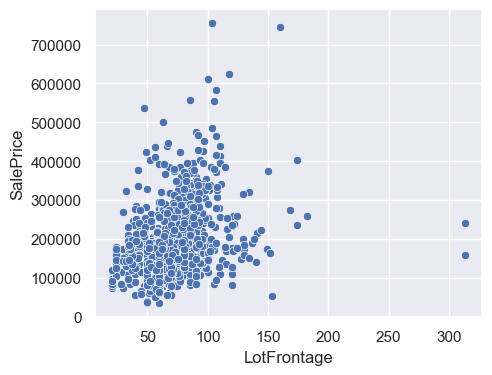

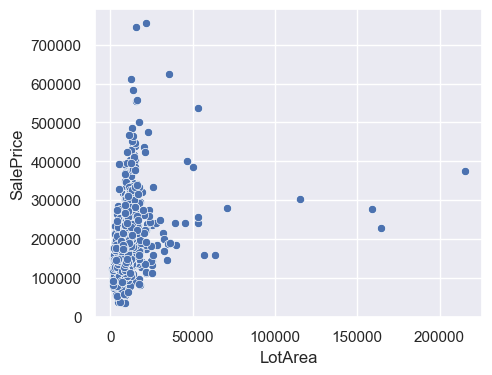

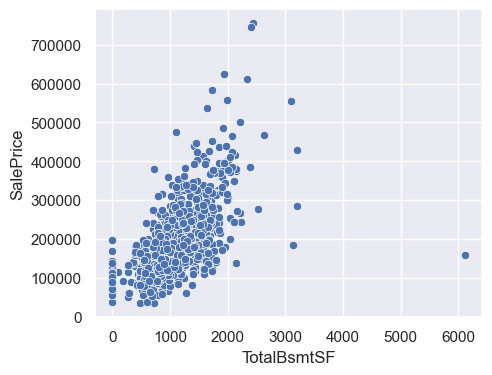

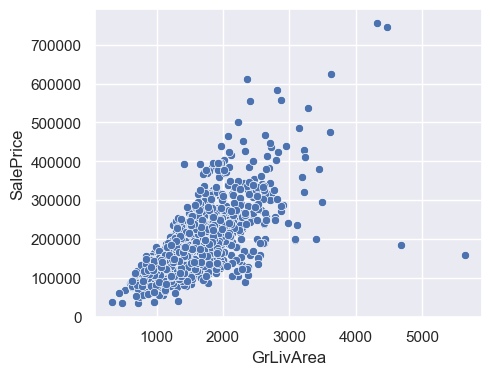

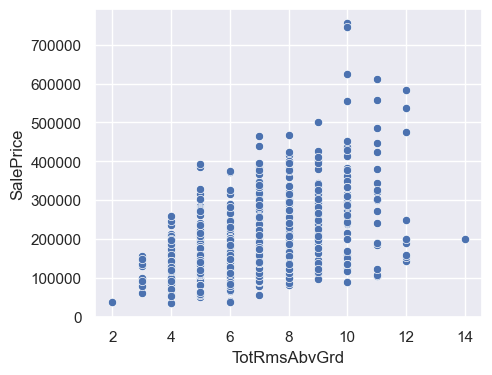

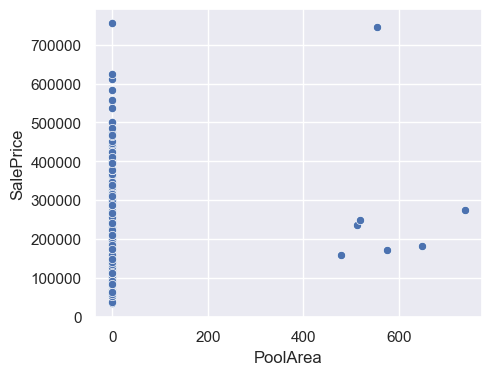

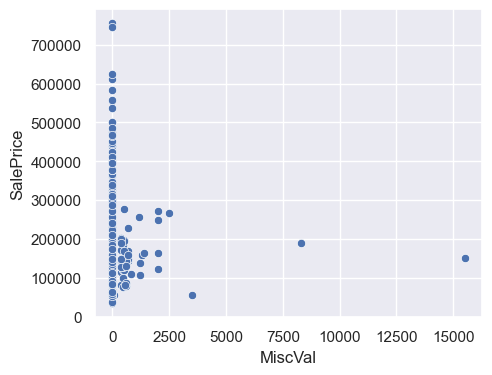

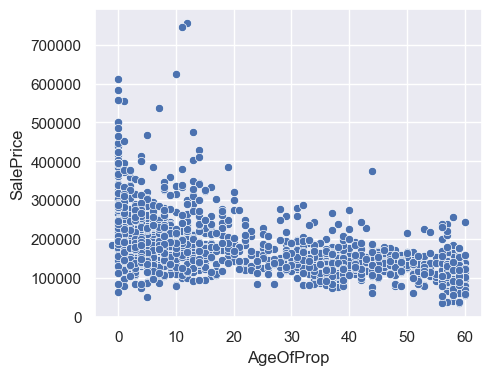

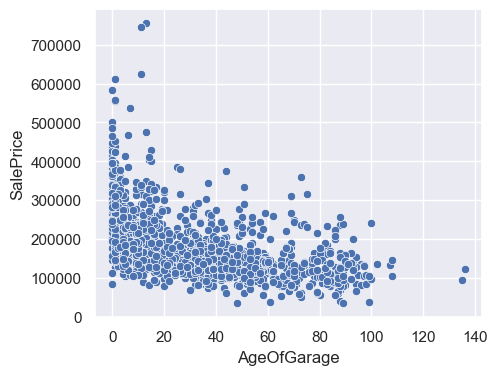

In [18]:
# Plotting Selected Numerical variables with target variable - Sales Price

selected_num_vars = ['LotFrontage', 'LotArea', 'TotalBsmtSF', 'GrLivArea', 'TotRmsAbvGrd', 'PoolArea', 'MiscVal', 'AgeOfProp', 'AgeOfGarage']
sns.set(rc={"figure.figsize":(5, 4)})
for i in selected_num_vars:
    sns.scatterplot(x = df[i], y = df["SalePrice"])
    plt.show()


 - We observe for th features like Lot Frontage, LotArea, TotalBsmtSF, GrLivArea, TotRmsAbvGrd show a increasing trend for SalesPrice; features like PoolArea, MiscVal do not show significant relationship while we see drop in SalesPrice with the age of property and Garage.

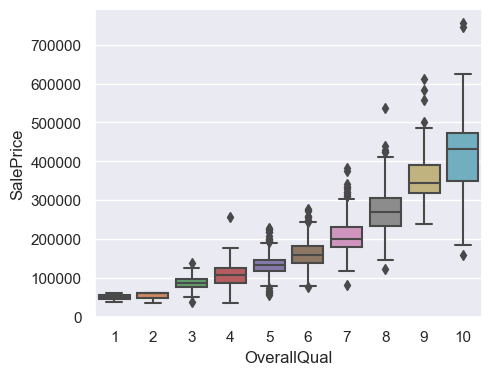

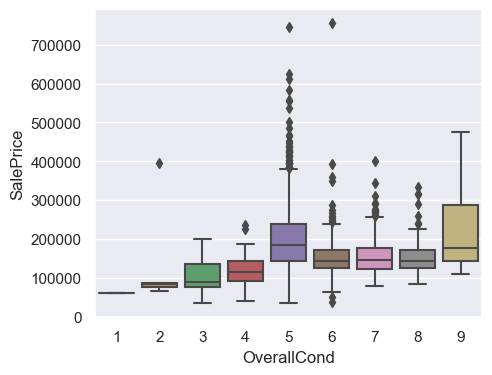

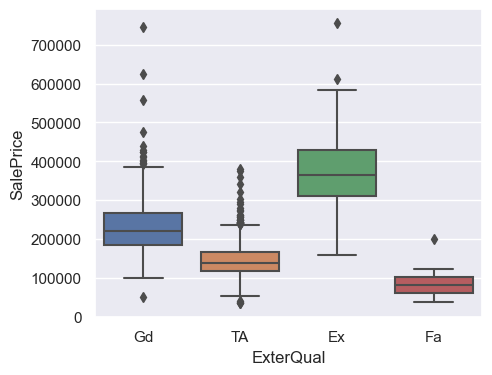

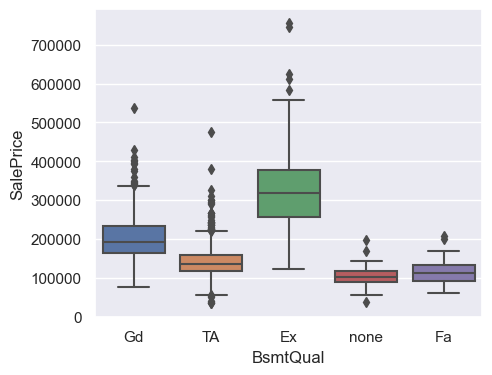

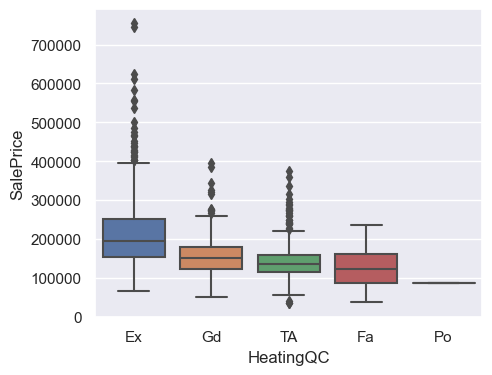

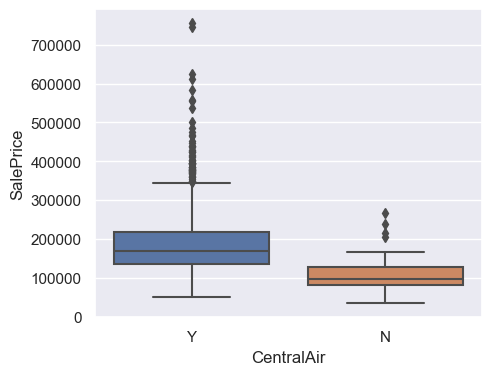

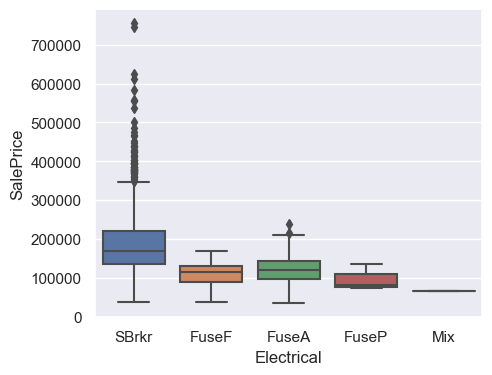

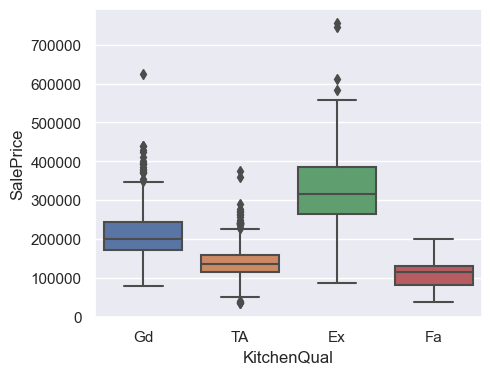

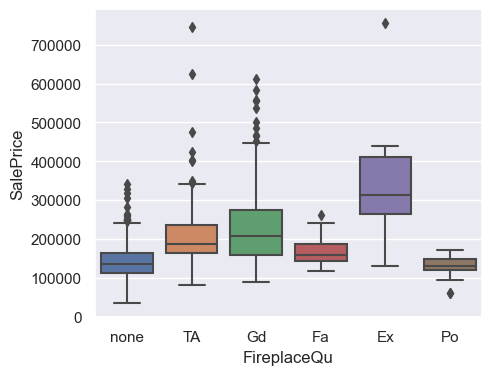

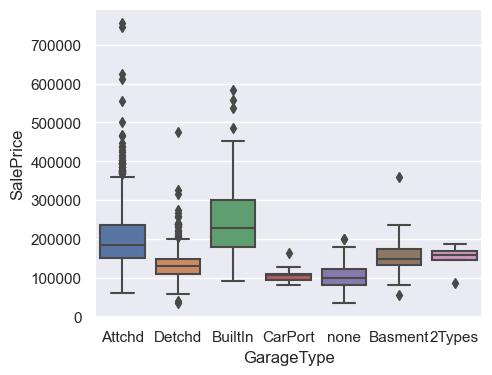

KeyError: 'GarageYrBlt'

In [19]:
# Relationship between Selected Categorical variables (Quality aspects of certain facilities) and target variable - Sales Price
selected_cat_vars = ['OverallQual' ,'OverallCond','ExterQual', 'BsmtQual',
                     'HeatingQC','CentralAir', 'Electrical','KitchenQual', 'FireplaceQu','GarageType', 'GarageYrBlt']
sns.set(rc={"figure.figsize":(5, 4)})
for i in selected_cat_vars:
    sns.boxplot(x = df[i], y = df['SalePrice'])
    plt.show()

 - We observe that the sales prices are higher for the properties which are in good condition, overall. Also, the sales prices are higher for the properties which have better quality of the facilities like Basement quality, heating, kitchen quality.

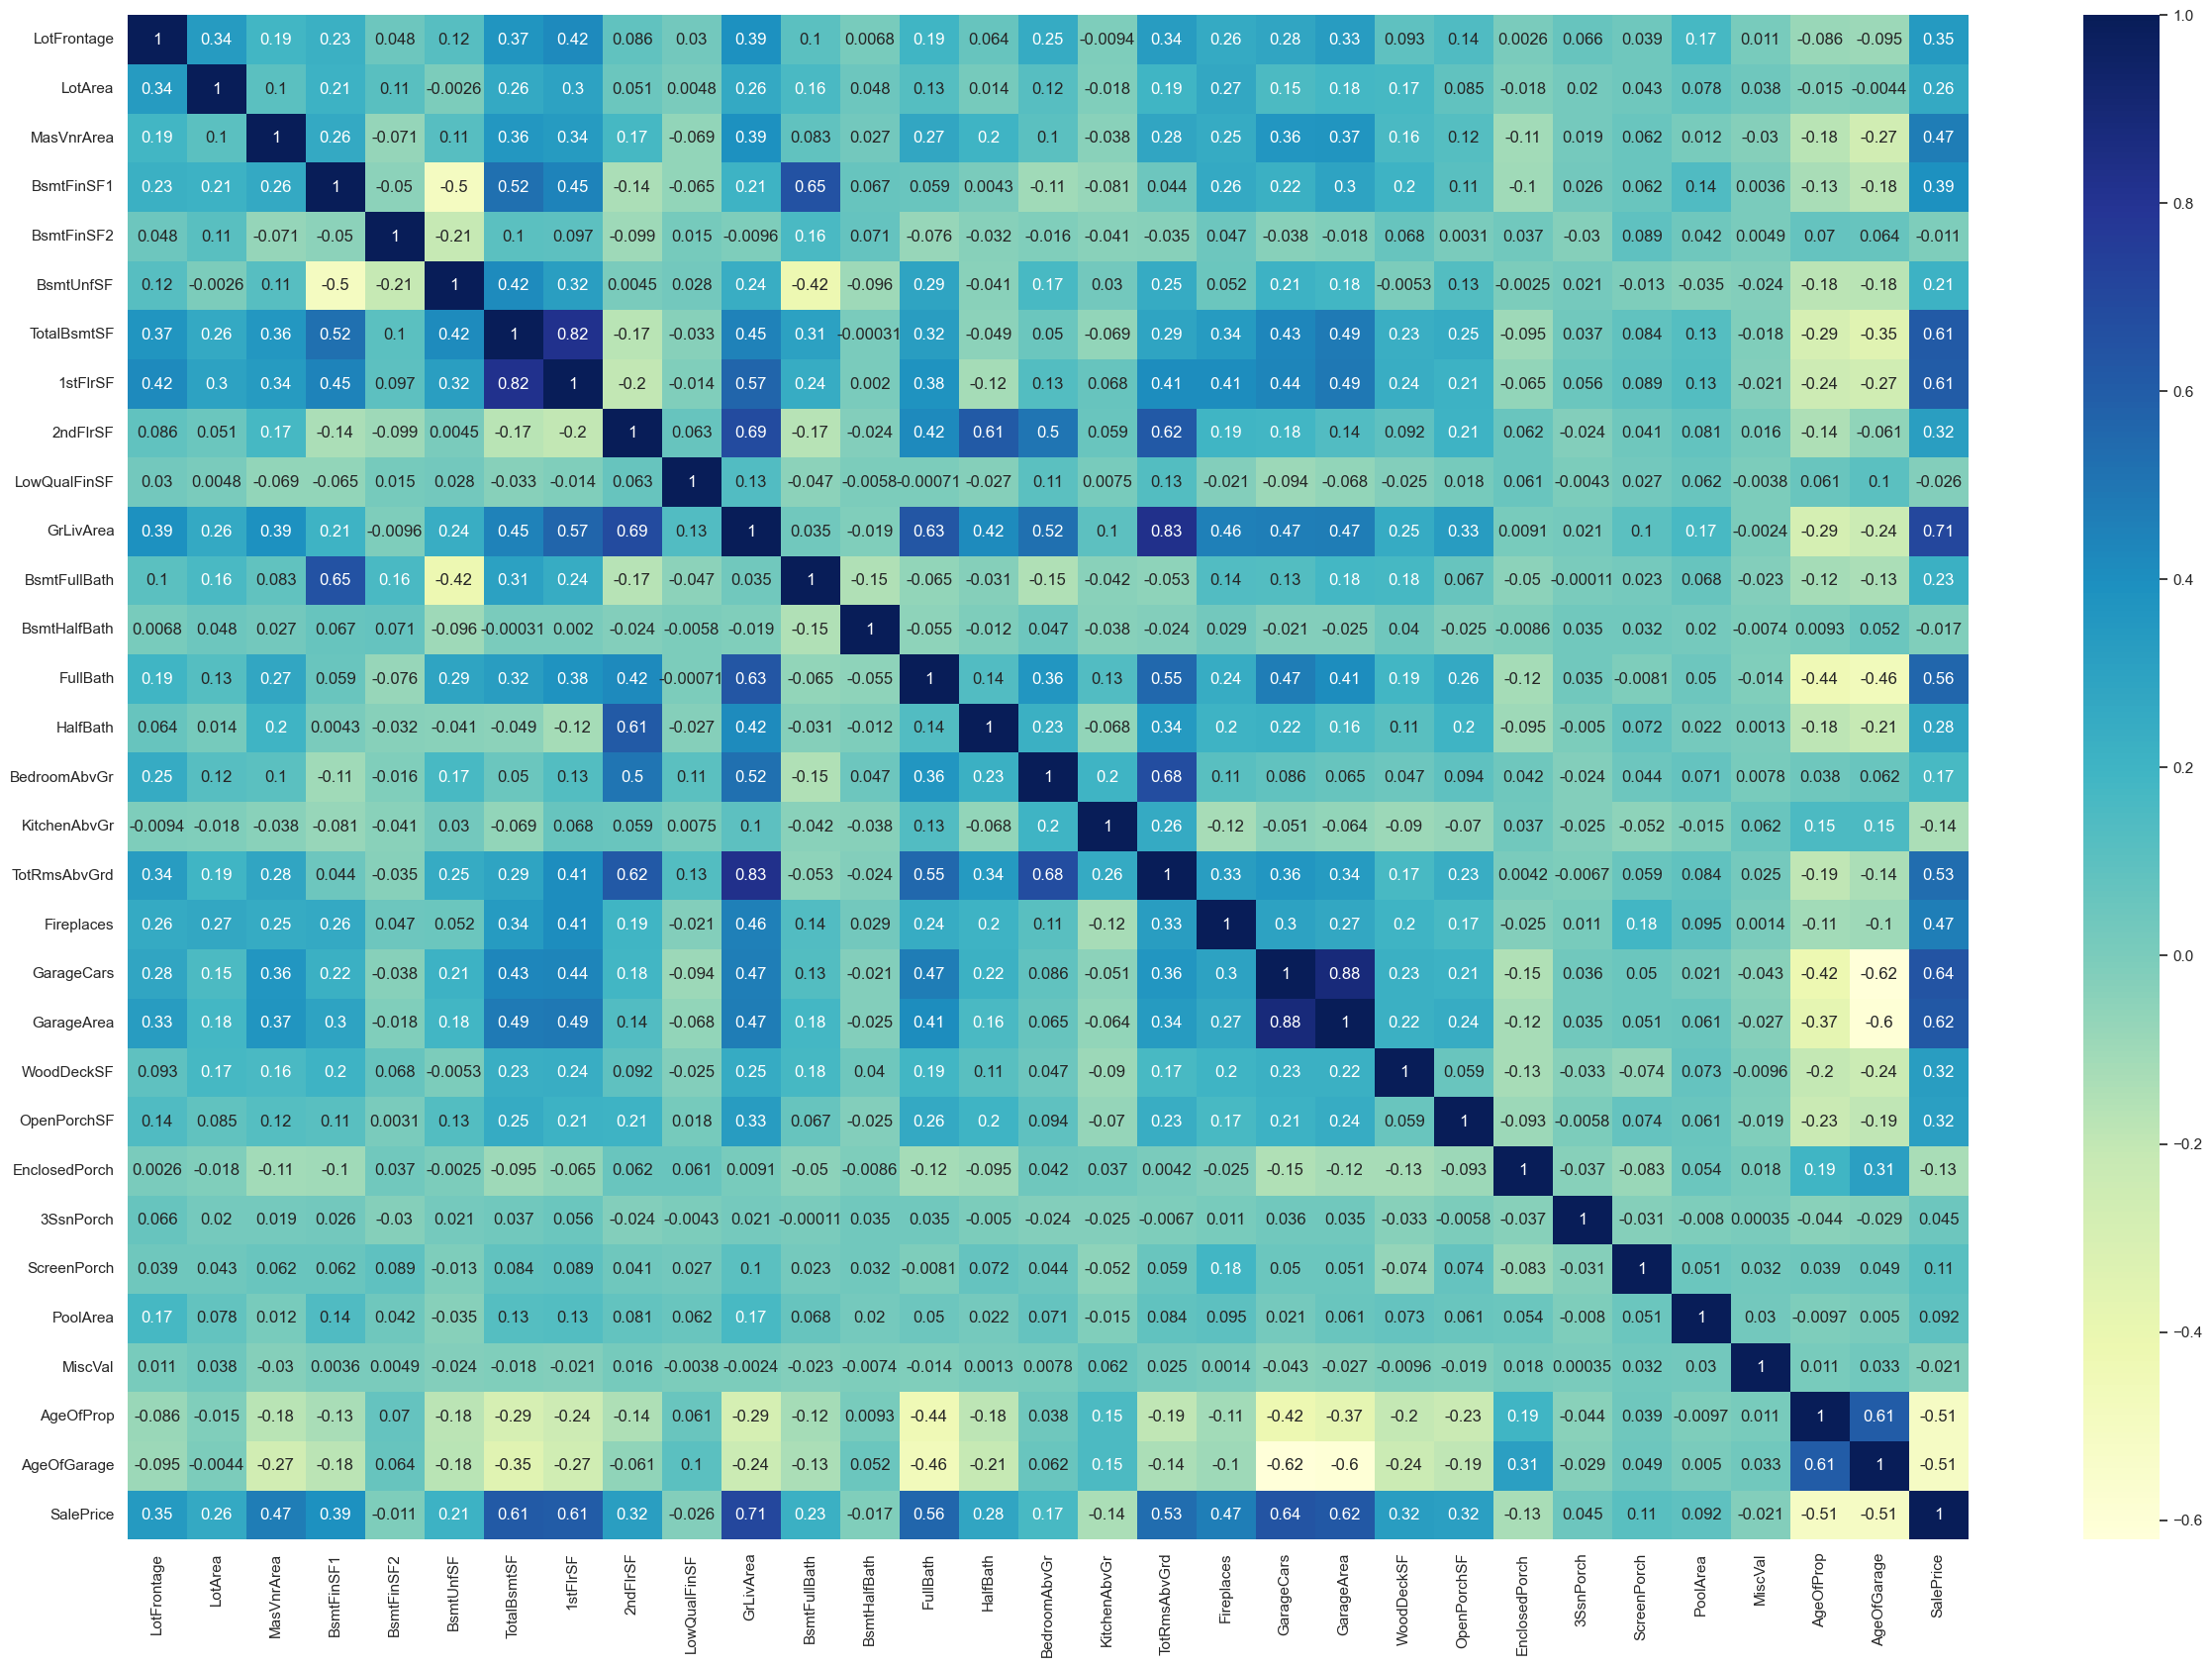

In [20]:
# Plotting correlations on a heatmap for numerical variables

plt.figure(figsize=(30,20))

sns.heatmap(df[num_vars+['SalePrice']].corr(), cmap="YlGnBu", annot=True)
plt.show()

 - We observe that there are quite a few features which are highly correlated - GarageCars with GarageArea, TolRmsAbvGrd with GrLivArea, TotalBsmtSF with 1stFlrSF; However, we are not dropping any features based on correlation matrix. We shall observe how different models handle correlated features.

### Step3 - Data Preparation

In [21]:
# Identifying levels in each categorical variables

df[cat_vars].nunique()

MSSubClass       15
MSZoning          5
LotShape          4
LandContour       4
LotConfig         5
LandSlope         3
Neighborhood     25
Condition1        9
BldgType          5
HouseStyle        8
OverallQual      10
OverallCond       9
RoofStyle         6
Exterior1st      15
Exterior2nd      16
MasVnrType        4
ExterQual         4
ExterCond         5
Foundation        6
BsmtQual          5
BsmtExposure      5
BsmtFinType1      7
BsmtFinType2      7
HeatingQC         5
CentralAir        2
Electrical        5
KitchenQual       4
FireplaceQu       6
GarageType        7
GarageFinish      4
GarageQual        6
PavedDrive        3
Fence             5
SaleType          9
SaleCondition     6
dtype: int64

#### Creating Dummy columns

In [22]:
# Mapping the different levels of encoded categorical variables based on data dictionary

define_MSSubClass = {20:'1-SAft1946', 30:'1-SBfr1945',40:'1-SW/FATT', 45:'1-1/2SUNF', 50:'1-1/2SF', 60:'2-SAft1946', 
                     70:'2-SBfr1945', 75:'2-1/2S', 80:'SPLORML',85:'SPLFOYER',90:'DUP', 120:'1-SPUDAftr1946', 150:'1-1/2SPUD',
                     160:'2-SPUDAftr1946', 180:'PUDMLSPLFOYER', 190:'2FAMCONV'}

define_AllQuality = {10:'VExc', 9:'Exc', 8:'VGood', 7:'Good', 6:'AbvAve', 5:'Ave', 4:'BlwAve', 3:'Fair', 2:'Poor', 1:'VPoor'}

define_AllCond = {10:'VExc', 9:'Exc', 8:'VGood', 7:'Good', 6:'AbvAve', 5:'Ave', 4:'BlwAve', 3:'Fair', 2:'Poor', 1:'VPoor'}

df.replace({"MSSubClass": define_MSSubClass, "OverallQual": define_AllQuality, "OverallCond": define_AllCond}, inplace = True)

# Creating Dummies for non-numerical features
df = pd.get_dummies(df, drop_first=True )
df.head()

,LotFrontage,LotArea,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,SalePrice,AgeOfProp,AgeOfGarage,MSSubClass_1-1/2SUNF,MSSubClass_1-SAft1946,MSSubClass_1-SBfr1945,MSSubClass_1-SPUDAftr1946,MSSubClass_1-SW/FATT,MSSubClass_2-1/2S,MSSubClass_2-SAft1946,MSSubClass_2-SBfr1945,MSSubClass_2-SPUDAftr1946,MSSubClass_2FAMCONV,MSSubClass_DUP,MSSubClass_PUDMLSPLFOYER,MSSubClass_SPLFOYER,MSSubClass_SPLORML,MSZoning_FV,MSZoning_RH,MSZoning_RL,MSZoning_RM,LotShape_IR2,...,HeatingQC_Fa,HeatingQC_Gd,HeatingQC_Po,HeatingQC_TA,CentralAir_Y,Electrical_FuseF,Electrical_FuseP,Electrical_Mix,Electrical_SBrkr,KitchenQual_Fa,KitchenQual_Gd,KitchenQual_TA,FireplaceQu_Fa,FireplaceQu_Gd,FireplaceQu_Po,FireplaceQu_TA,FireplaceQu_none,GarageType_Attchd,GarageType_Basment,GarageType_BuiltIn,GarageType_CarPort,GarageType_Detchd,GarageType_none,GarageFinish_RFn,GarageFinish_Unf,GarageFinish_none,GarageQual_Fa,GarageQual_Gd,GarageQual_Po,GarageQual_TA,GarageQual_none,PavedDrive_P,PavedDrive_Y,Fence_GdWo,Fence_MnPrv,Fence_MnWw,Fence_none,SaleType_CWD,SaleType_Con,SaleType_ConLD,SaleType_ConLI,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
0,65.0,8450,196.0,706,0,150,856,856,854,0,1710,1,0,2,1,3,1,8,0,2,548,0,61,0,0,0,0,0,208500,5,5.0,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,True,False,False,...,False,False,False,False,True,False,False,False,True,False,True,False,False,False,False,False,True,True,False,False,False,False,False,True,False,False,False,False,False,True,False,False,True,False,False,False,True,False,False,False,False,False,False,False,True,False,False,False,True,False
1,80.0,9600,0.0,978,0,284,1262,1262,0,0,1262,0,1,2,0,3,1,6,1,2,460,298,0,0,0,0,0,0,181500,31,31.0,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,...,False,False,False,False,True,False,False,False,True,False,False,True,False,False,False,True,False,True,False,False,False,False,False,True,False,False,False,False,False,True,False,False,True,False,False,False,True,False,False,False,False,False,False,False,True,False,False,False,True,False
2,68.0,11250,162.0,486,0,434,920,920,866,0,1786,1,0,2,1,3,1,6,1,2,608,0,42,0,0,0,0,0,223500,6,7.0,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,True,False,False,...,False,False,False,False,True,False,False,False,True,False,True,False,False,False,False,True,False,True,False,False,False,False,False,True,False,False,False,False,False,True,False,False,True,False,False,False,True,False,False,False,False,False,False,False,True,False,False,False,True,False
3,60.0,9550,0.0,216,0,540,756,961,756,0,1717,1,0,1,0,3,1,7,1,3,642,0,35,272,0,0,0,0,140000,36,8.0,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,True,False,False,...,False,True,False,False,True,False,False,False,True,False,True,False,False,True,False,False,False,False,False,False,False,True,False,False,True,False,False,False,False,True,False,False,True,False,False,False,True,False,False,False,False,False,False,False,True,False,False,False,False,False
4,84.0,14260,350.0,655,0,490,1145,1145,1053,0,2198,1,0,2,1,4,1,9,1,3,836,192,84,0,0,0,0,0,250000,8,8.0,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,True,False,False,...,False,False,False,False,True,False,False,False,True,False,True,False,False,False,False,True,False,True,False,False,False,False,False,True,False,False,False,False,False,True,False,False,True,False,False,False,True,False,False,False,False,False,False,False,True,False,False,False,True,False


#### Splitting the Data into Training and Test Sets

In [23]:
np.random.seed(0)
df_train, df_test = train_test_split(df, train_size = 0.7, test_size = 0.3, random_state = 100)
print(df_train.shape)
print(df_test.shape)

(1021, 240)
(438, 240)


#### Rescaling the numerical predictors

In [24]:
# We are using Min-Max Scaling

scaler = MinMaxScaler()

# Apply scaler() to all the numerical variables of train set (i.e.except the categorical/dummy)
num_vars.append('SalePrice')

df_train[num_vars] = scaler.fit_transform(df_train[num_vars])
df_train.head()


,LotFrontage,LotArea,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,SalePrice,AgeOfProp,AgeOfGarage,MSSubClass_1-1/2SUNF,MSSubClass_1-SAft1946,MSSubClass_1-SBfr1945,MSSubClass_1-SPUDAftr1946,MSSubClass_1-SW/FATT,MSSubClass_2-1/2S,MSSubClass_2-SAft1946,MSSubClass_2-SBfr1945,MSSubClass_2-SPUDAftr1946,MSSubClass_2FAMCONV,MSSubClass_DUP,MSSubClass_PUDMLSPLFOYER,MSSubClass_SPLFOYER,MSSubClass_SPLORML,MSZoning_FV,MSZoning_RH,MSZoning_RL,MSZoning_RM,LotShape_IR2,...,HeatingQC_Fa,HeatingQC_Gd,HeatingQC_Po,HeatingQC_TA,CentralAir_Y,Electrical_FuseF,Electrical_FuseP,Electrical_Mix,Electrical_SBrkr,KitchenQual_Fa,KitchenQual_Gd,KitchenQual_TA,FireplaceQu_Fa,FireplaceQu_Gd,FireplaceQu_Po,FireplaceQu_TA,FireplaceQu_none,GarageType_Attchd,GarageType_Basment,GarageType_BuiltIn,GarageType_CarPort,GarageType_Detchd,GarageType_none,GarageFinish_RFn,GarageFinish_Unf,GarageFinish_none,GarageQual_Fa,GarageQual_Gd,GarageQual_Po,GarageQual_TA,GarageQual_none,PavedDrive_P,PavedDrive_Y,Fence_GdWo,Fence_MnPrv,Fence_MnWw,Fence_none,SaleType_CWD,SaleType_Con,SaleType_ConLD,SaleType_ConLI,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
210,0.157534,0.019306,0.00,0.082920,0.0,0.169521,0.141408,0.113889,0.000000,0.0,0.081860,0.333333,0.0,0.333333,0.0,0.250,0.0,0.181818,0.000000,0.00,0.000000,0.000000,0.000000,0.173913,0.0,0.0,0.0,0.0,0.087627,0.967213,0.610294,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,...,False,False,False,True,False,False,False,False,False,False,False,True,False,False,False,False,True,False,False,False,False,False,True,False,False,True,False,False,False,False,True,False,True,False,False,False,True,False,False,False,False,False,False,False,True,False,False,False,True,False
318,0.236301,0.039403,0.16,0.174876,0.0,0.154110,0.220458,0.231481,0.616949,0.0,0.424289,0.333333,0.0,0.666667,0.5,0.500,0.0,0.545455,0.333333,0.75,0.462623,0.396733,0.114723,0.260870,0.0,0.0,0.0,0.0,0.312595,0.278689,0.117647,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,True,False,False,...,False,False,False,False,True,False,False,False,True,False,True,False,False,False,False,True,False,True,False,False,False,False,False,True,False,False,False,False,False,True,False,False,True,False,False,False,True,False,False,False,False,False,False,False,True,False,False,False,True,False
239,0.106164,0.033981,0.00,0.016655,0.0,0.274401,0.120295,0.098611,0.333656,0.0,0.201576,0.000000,0.0,0.333333,0.5,0.375,0.0,0.363636,0.333333,0.25,0.155148,0.000000,0.267686,0.000000,0.0,0.0,0.0,0.0,0.108457,1.000000,0.448529,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,...,False,False,False,True,True,False,False,False,False,False,False,True,False,True,False,False,False,False,False,False,False,True,False,False,True,False,False,False,False,True,False,False,True,False,True,False,False,False,False,False,False,False,False,False,True,False,False,False,True,False
986,0.130137,0.017931,0.00,0.000000,0.0,0.207620,0.079378,0.145602,0.307022,0.0,0.230015,0.000000,0.0,0.333333,0.0,0.250,0.0,0.181818,0.000000,0.25,0.179831,0.459743,0.000000,0.000000,0.0,0.0,0.0,0.0,0.114012,0.065574,0.411765,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,...,False,True,False,False,True,False,False,False,True,False,True,False,False,False,False,False,True,True,False,False,False,False,False,False,True,False,True,False,False,False,False,False,True,False,False,False,True,False,False,False,False,False,False,False,True,False,False,False,Tru

In [25]:
# Scaling the test set
df_test[num_vars] = scaler.fit_transform(df_test[num_vars])
df_test.head()


,LotFrontage,LotArea,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,SalePrice,AgeOfProp,AgeOfGarage,MSSubClass_1-1/2SUNF,MSSubClass_1-SAft1946,MSSubClass_1-SBfr1945,MSSubClass_1-SPUDAftr1946,MSSubClass_1-SW/FATT,MSSubClass_2-1/2S,MSSubClass_2-SAft1946,MSSubClass_2-SBfr1945,MSSubClass_2-SPUDAftr1946,MSSubClass_2FAMCONV,MSSubClass_DUP,MSSubClass_PUDMLSPLFOYER,MSSubClass_SPLFOYER,MSSubClass_SPLORML,MSZoning_FV,MSZoning_RH,MSZoning_RL,MSZoning_RM,LotShape_IR2,...,HeatingQC_Fa,HeatingQC_Gd,HeatingQC_Po,HeatingQC_TA,CentralAir_Y,Electrical_FuseF,Electrical_FuseP,Electrical_Mix,Electrical_SBrkr,KitchenQual_Fa,KitchenQual_Gd,KitchenQual_TA,FireplaceQu_Fa,FireplaceQu_Gd,FireplaceQu_Po,FireplaceQu_TA,FireplaceQu_none,GarageType_Attchd,GarageType_Basment,GarageType_BuiltIn,GarageType_CarPort,GarageType_Detchd,GarageType_none,GarageFinish_RFn,GarageFinish_Unf,GarageFinish_none,GarageQual_Fa,GarageQual_Gd,GarageQual_Po,GarageQual_TA,GarageQual_none,PavedDrive_P,PavedDrive_Y,Fence_GdWo,Fence_MnPrv,Fence_MnWw,Fence_none,SaleType_CWD,SaleType_Con,SaleType_ConLD,SaleType_ConLI,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
1436,0.133562,0.048827,0.00000,0.281536,0.0,0.128165,0.342314,0.242009,0.000000,0.0,0.161881,0.0,0.0,0.333333,0.0,0.5,0.333333,0.3,0.0,0.666667,0.423077,0.000000,0.000000,0.0,0.0,0.0,0.000000,0.0,0.143963,0.600000,0.244444,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,...,False,False,False,True,True,False,False,False,True,False,False,True,False,False,False,False,True,False,False,False,False,True,False,False,True,False,False,False,False,True,False,False,True,True,False,False,False,False,False,False,False,False,False,False,True,False,False,False,True,False
57,0.232877,0.065599,0.00000,0.000000,0.0,0.444444,0.340729,0.240183,0.541221,0.0,0.423335,0.0,0.0,0.666667,0.5,0.5,0.333333,0.5,0.0,0.666667,0.452724,0.000000,0.127971,0.0,0.0,0.0,0.000000,0.0,0.276424,0.033333,0.014815,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,True,False,False,...,False,False,False,False,True,False,False,False,True,False,True,False,False,False,False,False,True,True,False,False,False,False,False,True,False,False,False,False,False,True,False,False,True,False,False,False,True,False,False,False,False,False,False,False,True,False,False,False,True,False
780,0.143836,0.041693,0.04126,0.000000,0.0,0.639276,0.490095,0.419635,0.000000,0.0,0.280696,0.0,0.0,0.666667,0.0,0.5,0.333333,0.4,0.5,0.666667,0.322115,0.302198,0.038391,0.0,0.0,0.0,0.000000,0.0,0.240694,0.183333,0.088889,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,...,False,True,False,False,True,False,False,False,True,False,False,True,False,False,False,True,False,True,False,False,False,False,False,False,False,False,False,False,False,True,False,False,True,False,False,False,True,False,False,False,False,False,False,False,True,False,False,False,True,False
382,0.198630,0.050380,0.00000,0.000000,0.0,0.485271,0.372029,0.276256,0.539962,0.0,0.446854,0.0,0.0,0.666667,0.5,0.5,0.333333,0.6,0.0,0.666667,0.512019,0.197802,0.096892,0.0,0.0,0.0,0.000000,0.0,0.306053,0.016667,0.007407,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,True,False,False,...,False,False,False,False,True,False,False,False,True,False,True,False,False,False,False,False,True,True,False,False,False,False,False,True,False,False,False,False,False,True,False,False,True,False,False,False,True,False,False,False,False,False,False,False,True,False,False,False,True,False
1170,0.188356,0

#### Dividing into X and y sets for Model Building

In [26]:
# Train set

y_train = df_train.pop('SalePrice')
X_train = df_train

In [27]:
# Test set

y_test = df_test.pop('SalePrice')
X_test = df_test

### Step 4 - Model Building and Evaluation: MLR, Ridge and Lasso Regression

#### Linear Regression Model

In [28]:
estimator=LinearRegression()
lrmodel=RFE(estimator,n_features_to_select=50) #We are selecting top 5o features.

lrmodel=lrmodel.fit(X_train,y_train)
lrmodel.support_

array([ True,  True, False, False, False, False,  True,  True,  True,
        True,  True,  True, False,  True, False, False,  True, False,
       False,  True, False, False, False, False,  True, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False,  True,
        True,  True,  True, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False,  True,  True, False, False, False, False, False,
       False, False,  True,  True, False, False, False, False,  True,
       False, False, False, False, False, False, False, False, False,
       False, False,  True, False, False, False, False, False, False,
       False, False, False, False, False, False,  True, False, False,
       False,  True,  True,  True, False, False,  True,  True, False,
       False, False,  True, False, False, False, False,  True, False,
       False, False,

In [29]:
X_train.columns[lrmodel.support_] # Names of columns selected using RFE

Index(['LotFrontage', 'LotArea', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'FullBath', 'KitchenAbvGr',
       'GarageCars', '3SsnPorch', 'MSZoning_FV', 'MSZoning_RH', 'MSZoning_RL',
       'MSZoning_RM', 'Neighborhood_Crawfor', 'Neighborhood_Edwards',
       'Neighborhood_NoRidge', 'Neighborhood_NridgHt', 'Neighborhood_Somerst',
       'BldgType_2fmCon', 'OverallQual_Exc', 'OverallQual_VExc',
       'OverallQual_VGood', 'OverallQual_VPoor', 'OverallCond_Exc',
       'OverallCond_Fair', 'OverallCond_VPoor', 'RoofStyle_Shed',
       'Exterior1st_CBlock', 'Exterior1st_ImStucc', 'Exterior2nd_AsphShn',
       'Exterior2nd_CBlock', 'BsmtQual_Fa', 'BsmtQual_Gd', 'BsmtQual_TA',
       'BsmtQual_none', 'BsmtExposure_Gd', 'BsmtFinType1_none',
       'KitchenQual_Fa', 'KitchenQual_Gd', 'KitchenQual_TA',
       'GarageType_Attchd', 'GarageType_Basment', 'GarageType_BuiltIn',
       'GarageType_Detchd', 'GarageType_none', 'GarageFinish_none',
       

In [30]:
selected_features = X_train.columns[lrmodel.support_]

In [31]:
X_train_rfe= X_train[selected_features]

In [32]:
# Fitting the model for selected RFE features
lr = LinearRegression()
lr.fit(X_train_rfe,y_train)

LinearRegression()

In [33]:
# Predicting the target variable of train set using the linear model
y_pred_train = lr.predict(X_train_rfe)
y_pred_train

array([0.07654352, 0.41838495, 0.10391013, ..., 0.43397362, 0.43157636,
       0.11317808])

In [34]:
# Selecting RFE feature for the test dataset as well
X_test_rfe = X_test[selected_features]

In [35]:
# Predicting the target variable of test set using the linear model
y_pred_test = lr.predict(X_test_rfe)
y_pred_test

array([ 0.1406608 ,  0.26131549,  0.22286868,  0.27128791,  0.17997385,
        0.42955196,  0.32525365,  0.44217895,  0.08776885,  0.24822091,
        0.27284791,  0.27291841,  0.23596233,  0.33954863,  0.13472774,
        0.15045282,  0.23503573,  0.11800982,  0.1799261 ,  0.16526542,
        0.2332771 ,  0.10803473,  0.20646139,  0.11369896,  0.25743425,
        0.1542476 , -0.03774007,  0.10332196,  0.28032841,  0.19308593,
        0.1877353 ,  0.33173841,  0.32901749,  0.11097297,  0.16076847,
        0.02852819,  0.1417673 ,  0.15621108,  0.26975728,  0.15749693,
        0.52341398,  0.28258044,  0.23797436,  0.09773183,  0.2400421 ,
        0.08312828,  0.41415608,  0.16523285,  0.17912837,  0.09148232,
        0.34259716,  0.07516177,  0.48414625,  0.34222148,  0.21769482,
        0.11481384,  0.03897116,  0.26585011,  0.18361649,  0.61977873,
        0.16733136,  0.34074866,  0.20862926,  0.24092343,  0.30847113,
        0.34650845,  0.11793303,  0.15094858,  0.29737318,  0.14

##### Evaluating the Linear Regression model

In [36]:
# Checking the R-Squared value of train and test dataset
metric_LR = []
r2_score_LR_train = r2_score(y_train,y_pred_train)
print('Linear Reg -Training R-Squared: ',r2_score_LR_train)
metric_LR.append(r2_score_LR_train)

r2_score_LR_test = r2_score(y_test,y_pred_test)
print('Linear Reg -Test R-Squared: ',r2_score_LR_test)
metric_LR.append(r2_score_LR_test)

# Metrics to give overall sense of error in the model
# training set
rss_LR_train = np.sum(np.square(y_train-y_pred_train))
print('\nLinear Reg RSS Train: ',rss_LR_train)
metric_LR.append(rss_LR_train)

mse_LR_train = mean_squared_error(y_train, y_pred_train)
print('Linear Reg MSE Train: ',mse_LR_train)
metric_LR.append(mse_LR_train)

rmse_LR_train = mse_LR_train**0.5
print('Linear Reg RMSE Train: ',rmse_LR_train)
metric_LR.append(rmse_LR_train)

# testset
rss_LR_test = np.sum(np.square(y_test-y_pred_test))
print('\nLinear Reg RSS Test: ',rss_LR_test)
metric_LR.append(rss_LR_test)

mse_LR_test = mean_squared_error(y_test, y_pred_test)
print('Linear Reg MSE Test: ',mse_LR_test)
metric_LR.append(mse_LR_test)

rmse_LR_test = mse_LR_test**0.5
print('Linear Reg RMSE Test: ',rmse_LR_test)
metric_LR.append(rmse_LR_test)

Linear Reg -Training R-Squared:  0.8596638466563309
Linear Reg -Test R-Squared:  0.8492666644930558

Linear Reg RSS Train:  1.7268403604993512
Linear Reg MSE Train:  0.0016913225861893743
Linear Reg RMSE Train:  0.04112569253142583

Linear Reg RSS Test:  1.2906369707535885
Linear Reg MSE Test:  0.002946659750578969
Linear Reg RMSE Test:  0.05428314425840649


In [37]:
# Model parameters - Linear Regression
lr_params = list(lr.coef_ )
lr_params.insert(0, lr.intercept_)
lr_params = [round(i, 4) for i in lr_params]

cols = X_train_rfe.columns
cols = cols.insert(0, "Constant")
lr_mod = list(zip(cols, lr_params))
df_lr_params = pd.DataFrame(lr_mod)
df_lr_params.columns = ['Feature', 'Coefficient']

# Sorting the features based on coefficients' magnitude

df_lr_params = df_lr_params.sort_values((['Coefficient']), axis = 0, ascending = False, key=abs)
df_lr_params.head(10) #displaying top 10 features

,Feature,Coefficient
4,1stFlrSF,0.1568
7,GrLivArea,0.1527
2,LotArea,0.1301
24,OverallQual_VExc,0.1036
23,OverallQual_Exc,0.0844
19,Neighborhood_NoRidge,0.0817
10,KitchenAbvGr,-0.0798
11,GarageCars,0.0783
1,LotFrontage,-0.0651
5,2ndFlrSF,0.0640


Text(0.5, 0, 'Errors')

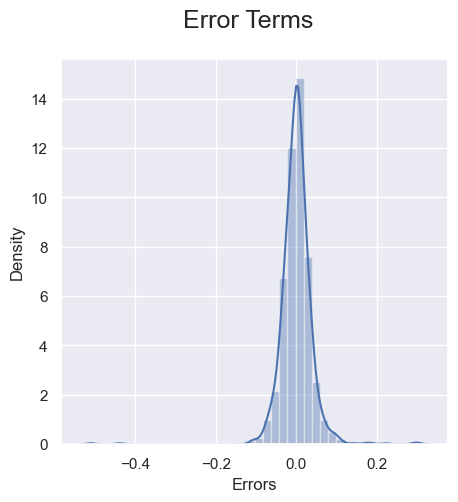

In [38]:
# Plot the histogram of the error terms

sns.set(rc={"figure.figsize":(5, 5)})
fig = plt.figure()
sns.distplot((y_train-y_pred_train), bins = 40)
fig.suptitle('Error Terms', fontsize = 18)                  # Plot heading 
plt.xlabel('Errors', fontsize = 12)                         # X-label

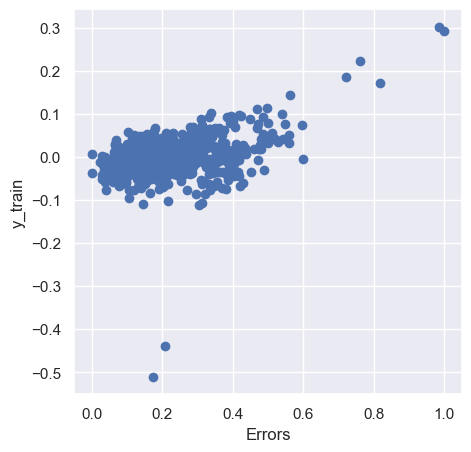

In [39]:
Errors = y_train-y_pred_train
sns.set(rc={"figure.figsize":(5, 5)})
plt.scatter(y_train, Errors)
               
plt.xlabel('Errors', fontsize = 12)
plt.ylabel('y_train')
plt.show()


The Linear Regession model is actually giving good results, the R-Square value does not vary too much between train and test sets and is above 80%; Similarly, the RMSE value is low too indicating. The residual term analysis is fairly good. Hence we can say this is a decent model to use.
However, we will go ahead and build the model using Ridge and Lasso Regression

#### Ridge Regression

In [40]:
# List of alphas to tune
params = {'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 
 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0, 
 4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50, 100, 500, 1000 ]}


ridge = Ridge()

# Cross validation
folds = 5
model_cv = GridSearchCV(estimator = ridge, 
                        param_grid = params, 
                        scoring= 'neg_mean_absolute_error', 
                        cv = folds, 
                        return_train_score=True,
                        verbose = 1)            
model_cv.fit(X_train, y_train) 

Fitting 5 folds for each of 28 candidates, totalling 140 fits


GridSearchCV(cv=5, estimator=Ridge(),
             param_grid={'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 0.2, 0.3,
                                   0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0,
                                   4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50,
                                   100, 500, 1000]},
             return_train_score=True, scoring='neg_mean_absolute_error',
             verbose=1)

In [41]:
# Printing the best hyperparameter alpha
print(model_cv.best_params_)

{'alpha': 7.0}


In [42]:
# Fitting the Ridge Model for alpha = 7 and printing coefficients to see which have been penalized
alpha = 7
ridge = Ridge(alpha = alpha)

ridge.fit(X_train,y_train)
print(ridge.coef_)

[-3.33545850e-03  2.44849770e-02  2.89254988e-02  1.56447350e-02
  1.09995488e-02  1.94216431e-02  2.45304709e-02  4.33001655e-02
  6.84838500e-02 -7.76875391e-03  6.23510678e-02  2.67536042e-02
  1.54099879e-03  4.30697907e-02  1.68270279e-02  1.04407949e-02
 -1.72079394e-02  3.78392475e-02  1.97884509e-02  4.08693697e-02
  2.13637751e-02  1.80609654e-02  2.49053726e-03  4.03142761e-03
  1.39691883e-02  7.68621769e-03  5.89311221e-03 -5.39120536e-04
 -1.40577832e-02 -5.14892488e-03  3.05025079e-03  9.48626320e-03
 -4.89527838e-03 -1.08825243e-02  2.31092322e-03  2.13720134e-03
  3.02320549e-04  3.89932110e-03 -1.15272855e-02 -7.57696081e-03
 -3.44479997e-03 -6.01165266e-03 -1.53129624e-03 -1.41144849e-03
  7.53330679e-03  9.15875994e-03  1.07101185e-02  5.37611015e-03
  6.74555917e-03 -9.45876799e-03  2.63149100e-04  1.41128858e-02
  1.69540496e-02  1.97194057e-02  1.28954958e-02 -1.52905487e-02
 -5.07384328e-03 -3.75464938e-03  8.31122795e-03  4.84544216e-03
 -2.11813521e-03 -3.95167

In [43]:
# Predicting target variable values for train and test sets for Ridge model
y_pred_train_ridge = ridge.predict(X_train)
y_pred_test_ridge = ridge.predict(X_test)

##### Evaluating the Ridge Regression model

In [44]:
# Checking the R-Squared value of train and test dataset
metric_Ridge = []
r2_score_Ridge_train = r2_score(y_train,y_pred_train_ridge)
print('Ridge Reg -Training R-Squared: ',r2_score_Ridge_train)
metric_Ridge.append(r2_score_Ridge_train)

r2_score_Ridge_test = r2_score(y_test,y_pred_test_ridge)
print('Ridge Reg -Test R-Squared: ',r2_score_Ridge_test)
metric_Ridge.append(r2_score_Ridge_test)

# Metrics to give overall sense of error in the model
#training set
rss_Ridge_train = np.sum(np.square(y_train-y_pred_train_ridge))
print('\nRidge Reg RSS Train: ',rss_Ridge_train)
metric_Ridge.append(rss_Ridge_train)

mse_Ridge_train = mean_squared_error(y_train, y_pred_train_ridge)
print('Ridge Reg MSE Train: ',mse_Ridge_train)
metric_Ridge.append(mse_Ridge_train)

rmse_Ridge_train = mse_Ridge_train**0.5
print('Ridge Reg RMSE Train: ',rmse_Ridge_train)
metric_Ridge.append(rmse_Ridge_train)

#testset
rss_Ridge_test = np.sum(np.square(y_test-y_pred_test_ridge))
print('\nRidge Reg RSS Test: ',rss_Ridge_test)
metric_Ridge.append(rss_Ridge_test)

mse_Ridge_test = mean_squared_error(y_test, y_pred_test_ridge)
print('Ridge Reg MSE Test: ',mse_Ridge_test)
metric_Ridge.append(mse_Ridge_test)

rmse_Ridge_test = mse_Ridge_test**0.5
print('Ridge Reg RMSE Test: ',rmse_Ridge_test)
metric_Ridge.append(rmse_Ridge_test)

Ridge Reg -Training R-Squared:  0.8870030916549165
Ridge Reg -Test R-Squared:  0.8503009251493743

Ridge Reg RSS Train:  1.3904301727872521
Ridge Reg MSE Train:  0.001361831706941481
Ridge Reg RMSE Train:  0.03690300403681902

Ridge Reg RSS Test:  1.281781232001764
Ridge Reg MSE Test:  0.0029264411689537994
Ridge Reg RMSE Test:  0.054096591102894824


In [45]:
# Model parameters - Ridge regression
ridge_params = list(ridge.coef_ )
ridge_params.insert(0, ridge.intercept_)
ridge_params = [round(i, 4) for i in ridge_params]

cols = X_train.columns
cols = cols.insert(0, "Constant")
ridge_mod = list(zip(cols, ridge_params))
df_ridge_params = pd.DataFrame(ridge_mod)
df_ridge_params.columns = ['Feature', 'Coefficient']

# Sorting the features based on coefficients' magnitude
df_ridge_params = df_ridge_params.sort_values((['Coefficient']), axis = 0, ascending = False, key=abs)
df_ridge_params.head(11) #displaying top 10 features plus constant term 

,Feature,Coefficient
0,Constant,0.1140
110,OverallQual_VExc,0.0710
9,2ndFlrSF,0.0685
11,GrLivArea,0.0624
75,Neighborhood_NoRidge,0.0592
106,OverallQual_Exc,0.0591
8,1stFlrSF,0.0433
14,FullBath,0.0431
20,GarageCars,0.0409
18,TotRmsAbvGrd,0.0378


#### Lasso Regression

In [46]:
# List of alphas to tune
params = {'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 
 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0, 
 4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50, 100, 500, 1000 ]}


lasso = Lasso()

# Cross validation
folds = 5
model_cv = GridSearchCV(estimator = lasso, 
                        param_grid = params, 
                        scoring= 'neg_mean_absolute_error', 
                        cv = folds, 
                        return_train_score=True,
                        verbose = 1)            
model_cv.fit(X_train, y_train) 

Fitting 5 folds for each of 28 candidates, totalling 140 fits


GridSearchCV(cv=5, estimator=Lasso(),
             param_grid={'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 0.2, 0.3,
                                   0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0,
                                   4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50,
                                   100, 500, 1000]},
             return_train_score=True, scoring='neg_mean_absolute_error',
             verbose=1)

In [47]:
# Printing the best hyperparameter alpha
print(model_cv.best_params_)

{'alpha': 0.0001}


In [48]:
# Fitting the Lasso Model for alpha = 0.0001 and printing coefficients to see which have been penalized
alpha = 0.0001
lasso = Lasso(alpha = alpha)

lasso.fit(X_train,y_train)
print(lasso.coef_)

[-1.39718375e-02  4.82289969e-02  1.41512626e-02  0.00000000e+00
  0.00000000e+00  8.66112303e-03  0.00000000e+00  0.00000000e+00
  6.22817427e-02 -1.44048635e-02  2.58429883e-01  3.20603120e-02
  0.00000000e+00  3.34691493e-02  8.54408333e-03  0.00000000e+00
 -3.09358626e-02  5.55978696e-03  7.37735410e-03  5.61806939e-02
  0.00000000e+00  1.05906042e-02 -7.36231958e-04  0.00000000e+00
  1.54578873e-02  7.42806527e-03 -0.00000000e+00  0.00000000e+00
 -1.04660939e-02 -0.00000000e+00  0.00000000e+00  1.24057816e-02
 -0.00000000e+00 -0.00000000e+00  0.00000000e+00 -0.00000000e+00
 -0.00000000e+00  0.00000000e+00 -6.16911066e-04 -1.03473862e-03
  0.00000000e+00 -0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  9.84843675e-04  5.20158862e-03  0.00000000e+00
  8.14650745e-03 -5.49598101e-03  2.87534569e-04  1.48635512e-02
  2.16742937e-02  2.35511265e-02  1.11772138e-02 -1.16759647e-02
 -0.00000000e+00 -1.50079396e-03  4.81602907e-03  0.00000000e+00
 -0.00000000e+00  0.00000

In [49]:
# Predicting target variable values for train and test sets for Lasso model
y_pred_train_lasso = lasso.predict(X_train)
y_pred_test_lasso = lasso.predict(X_test)

##### Evaluating the Lasso Regression model

In [50]:
# Checking the R-Squared value of train and test dataset
metric_Lasso = []
r2_score_Lasso_train = r2_score(y_train,y_pred_train_lasso)
print('Lasso Reg -Training R-Squared: ',r2_score_Lasso_train)
metric_Lasso.append(r2_score_Lasso_train)

r2_score_Lasso_test = r2_score(y_test,y_pred_test_lasso)
print('Lasso Reg -Test R-Squared: ',r2_score_Lasso_test)
metric_Lasso.append(r2_score_Lasso_test)

# Metrics to give overall sense of error in the model
#training set
rss_Lasso_train = np.sum(np.square(y_train-y_pred_train_lasso))
print('\nLasso Reg RSS Train: ',rss_Lasso_train)
metric_Lasso.append(rss_Lasso_train)

mse_Lasso_train = mean_squared_error(y_train, y_pred_train_lasso)
print('Lasso Reg MSE Train: ',mse_Lasso_train)
metric_Lasso.append(mse_Lasso_train)

rmse_Lasso_train = mse_Lasso_train**0.5
print('Lasso Reg RMSE Train: ',rmse_Lasso_train)
metric_Lasso.append(rmse_Lasso_train)

#testset
rss_Lasso_test = np.sum(np.square(y_test-y_pred_test_lasso))
print('\nLasso Reg RSS Test: ',rss_Lasso_test)
metric_Lasso.append(rss_Lasso_test)

mse_Lasso_test = mean_squared_error(y_test, y_pred_test_lasso)
print('Lasso Reg MSE Test: ',mse_Lasso_test)
metric_Lasso.append(mse_Lasso_test)

rmse_Lasso_test = mse_Lasso_test**0.5
print('Lasso Reg RMSE Test: ',rmse_Lasso_test)
metric_Lasso.append(rmse_Lasso_test)

Lasso Reg -Training R-Squared:  0.8928693120099694
Lasso Reg -Test R-Squared:  0.8544682602516152

Lasso Reg RSS Train:  1.318246164380802
Lasso Reg MSE Train:  0.001291132384310286
Lasso Reg RMSE Train:  0.03593233062730952

Lasso Reg RSS Test:  1.2460989011199965
Lasso Reg MSE Test:  0.0028449746600913164
Lasso Reg RMSE Test:  0.05333830387340149


In [51]:
# Model parameters - Lasso Regression
lasso_params = list(lasso.coef_ )
lasso_params.insert(0, lasso.intercept_)
lasso_params = [round(i, 4) for i in lasso_params]

cols = X_train.columns
cols = cols.insert(0, "Constant")
lasso_mod = list(zip(cols, lasso_params))
df_lasso_params = pd.DataFrame(lasso_mod)
df_lasso_params.columns = ['Feature', 'Coefficient']

# Sorting the features based on coefficients' magnitude

df_lasso_params = df_lasso_params.sort_values((['Coefficient']), axis = 0, ascending = False, key=abs)
df_lasso_params.head(11) #Displaying top 10 features plus constant term

,Feature,Coefficient
11,GrLivArea,0.2584
110,OverallQual_VExc,0.1218
106,OverallQual_Exc,0.0981
0,Constant,0.0774
75,Neighborhood_NoRidge,0.0643
9,2ndFlrSF,0.0623
20,GarageCars,0.0562
2,LotArea,0.0482
111,OverallQual_VGood,0.0439
76,Neighborhood_NridgHt,0.0379


#### Summarizing the model performance

In [52]:
# Creating a table of all metrics

table = {'Metric':['R2 Score Train', 'R2 Score Test', 'RSS Train', 'MSE Train', 'RMSE Train','RSS Test','MSE Test', 'RMSE Test'],
         'Linear Regression': metric_LR}

lr_metric = pd.DataFrame(table, columns = ['Metric', 'Linear Regression'])

rg_metric = pd.Series(metric_Ridge, name = 'Ridge Regression')
ls_metric = pd.Series(metric_Lasso, name = 'Lasso Regression')

final_metric = pd.concat([lr_metric, rg_metric, ls_metric], axis = 1)
final_metric

,Metric,Linear Regression,Ridge Regression,Lasso Regression
0,R2 Score Train,0.859664,0.887003,0.892869
1,R2 Score Test,0.849267,0.850301,0.854468
2,RSS Train,1.726840,1.390430,1.318246
3,MSE Train,0.001691,0.001362,0.001291
4,RMSE Train,0.041126,0.036903,0.035932
5,RSS Test,1.290637,1.281781,1.246099
6,MSE Test,0.002947,0.002926,0.002845
7,RMSE Test,0.054283,0.054097,0.053338


#### In conculsion, we can say that both Ridge and Lasso Regression models are performing better than the Linear regression model on test set. Lasso is considered to be better and robust as it reduces several feature coefficients to zero, making the model simpler.

#### Further, Surprise Housing must evaluate its decision to invest in property based on following important features - 
 - GrLivArea
 - OverallQual - Very Excellent or Excellent
 - Neighbourhood - like NorthRidge, Northridge Heights, Crawford
 - 2ndFloor SF
 - GarageCars
 